Python option pricing engine. In this file there we will price European call and put option and plot graphs for payoffs and greeks.

In [1]:
#importing the packages needed
import sys
!{sys.executable} -m pip install scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr
from scipy.stats import norm

You should consider upgrading via the 'C:\Users\Geekerd\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
#input from user in order to get information
rf = 0.02/256
print(rf)
stock = input('What stock is the option on?: ')
option_type = input('Call or put?: ')
strike = float(input('Please insert the strike: '))
time_to_mat = int(input('Please insert the time to maturity in days: '))
days_for_vol = int(input ('Please insert the number of days to consider to get the historical volatiility: '))

7.8125e-05
What stock is the option on?: TSLA
Call or put?: Call
Please insert the strike: 1300
Please insert the time to maturity in days: 30
Please insert the number of days to consider to get the historical volatiility: 40


In [3]:

#insert the date
end = dt.datetime(2021,11,8)
start = end-dt.timedelta(days=days_for_vol)
start,end



(datetime.datetime(2021, 9, 29, 0, 0), datetime.datetime(2021, 11, 8, 0, 0))

In [4]:
#select the chosen stock from the user input
chosen_stock = [stock]
print('The selected stocks is '+ str(chosen_stock))
#get data for that stock
chosen_stock_data =pdr.get_data_yahoo(chosen_stock,start,end)
chosen_stock_data

The selected stocks is ['TSLA']


Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2021-09-29,781.309998,781.309998,793.500000,770.679993,779.799988,20942900
2021-09-30,775.479980,775.479980,789.130005,775.000000,781.000000,17956000
2021-10-01,775.219971,775.219971,780.780029,763.590027,778.400024,17031400
2021-10-04,781.530029,781.530029,806.969971,776.119995,796.500000,30483300
2021-10-05,780.590027,780.590027,797.309998,774.200012,784.799988,18432600
2021-10-06,782.750000,782.750000,786.659973,773.219971,776.200012,14632800
2021-10-07,793.609985,793.609985,805.000000,783.380005,785.460022,19195800
2021-10-08,785.489990,785.489990,796.380005,780.909973,796.210022,16711100


In [5]:
#getting only the closing prices
chosen_stock_data_close = chosen_stock_data.Close
chosen_stock_data_close.head()


Symbols,TSLA
Date,
2021-09-29,781.309998
2021-09-30,775.479980
2021-10-01,775.219971
2021-10-04,781.530029
2021-10-05,780.590027


In [6]:
#statistics about the prices
chosen_stock_data_close.describe()


Symbols,TSLA
count,29.000000
mean,938.327927
std,167.555179
min,775.219971
25%,791.940002
50%,865.799988
75%,1077.040039
max,1229.910034


<AxesSubplot:xlabel='Date'>

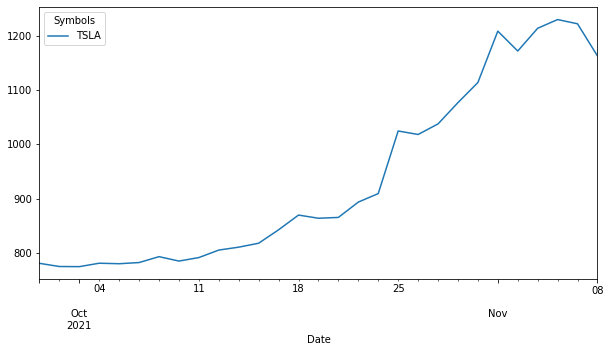

In [7]:
#plotting the closing prices
chosen_stock_data_close.plot(figsize=(10,5))

In [8]:
#getting the returns
returns =chosen_stock_data_close/chosen_stock_data_close.shift(1)-1
returns = returns.dropna()
returns

Symbols,TSLA
Date,
2021-09-30,-0.007462
2021-10-01,-0.000335
2021-10-04,0.008140
2021-10-05,-0.001203
2021-10-06,0.002767
2021-10-07,0.013874
2021-10-08,-0.010232
2021-10-11,0.008211
2021-10-12,0.017400


<AxesSubplot:xlabel='Date'>

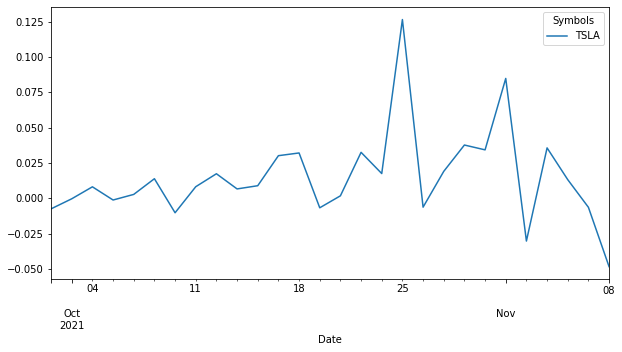

In [9]:
#plotting returns
returns.plot(figsize=(10,5))

In [10]:
#std deviation
sigma = returns.std()
sigma

Symbols
TSLA    0.032854
dtype: float64

In [16]:
#implementing Black Scholes model without dividends


from scipy.stats import norm

#setting the parameters for the bs model

S0= pd.DataFrame(chosen_stock_data_close).to_numpy()           #initial stock price
S0 = S0[-1]
print(S0)

K = strike
T = time_to_mat

#defining the equation for the options
def bs_scholes(S0,rf,K,T,sigma,option_type):
    #setting the parameters d1 and d2
    d1= (np.log(S0/K)+(rf+sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2= d1-sigma*np.sqrt(T)
    try:
        if option_type == 'Call':
            price = S0*norm.cdf(d1,0,1)-K*np.exp(-rf*T)*norm.cdf(d2,0,1)
        
        elif option_type =='Put':
            price = K*np.exp(-rf*T)*norm.cdf(-d2,0,1)-S0*norm.cdf(-d1,0,1)
        return price
    except:
        print('Please insert Put or Call')


print(bs_scholes(S0,rf,K,T,sigma,option_type))
        
        
        

[1162.93994141]
[36.82674285]
